# Problem Statement

Thẻ tín dụng (credit card) là loại thẻ cho phép người sử dụng thẻ có thể mua hàng, thanh toán các sản phẩm hàng hóa, dịch vụ tại cửa hàng, đại lý, nhà hàng, khách sạn và thanh toán lại cho ngân hàng sau. Sự tiện lợi của thẻ tín dụng là rất lớn. Tuy nhiên về phía ngân hàng, họ cần kiểm soát được tình hình thanh toán của khách hàng để có thể tránh được những trường hợp không trả được nợ, gây tổn thất cho ngân hàng. Với việc phân tích dự báo tình hình trả nợ của khách hàng dựa trên những thông tin giao dịch và những thông tin liên quan khác là cần thiết và quan trọng để ngân hàng có thể có những chính sách tránh gây tổn thất cho ngân hàng từ việc khách hàng không thể trả được nợ thẻ tín dụng.

**Dataset Attributes**


- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

---

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

# I. Data Overview

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**Nhận xét**

- Bộ dataset có 30000 dòng, 25 cột
- Các trường dữ liệu categorical đã được mã hóa trước đó thành dưới dạng các số nguyên
- Không có dữ liệu null trong bộ dataset này

In [9]:
# Loại bỏ trường dữ liệu không cần thiết
df.drop('ID', axis=1, inplace=True)

In [10]:
# Đổi tên trường dữ liệu để tiến hành phân tích
df.rename(columns={
        'default.payment.next.month' : 'default',
        'PAY_0' : 'PAY_1'
    }, 
    inplace=True)

In [11]:
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [12]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

---

# II. Exploratory Data Analysis

In [13]:
# list of features
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

target_feature = 'default'

num_features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
                'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

## 1. Target feature: default

In [14]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [15]:
df['default'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

Text(0.5, 1.0, 'Default cases')

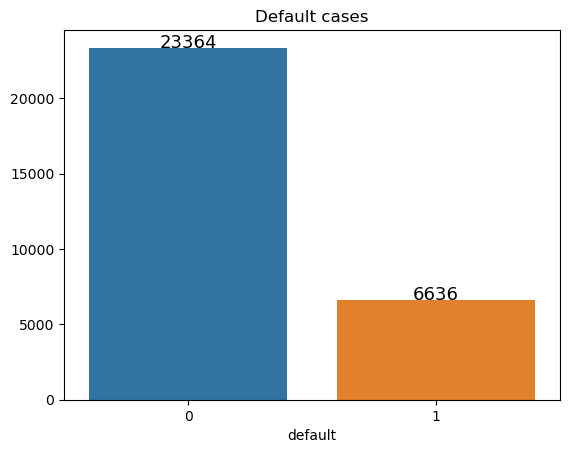

In [16]:
fig, ax = plt.subplots(1,1)

ax = sns.countplot(data=df, x='default')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=13)
ax.set_ylabel(None)
ax.set_title('Default cases')

**Nhận xét**

- Bộ dataset tương đối mất cân bằng giữa 2 class **(imbalanced dataset)**
- Số lượng khách hàng mất khả năng trả nợ chiếm tỷ lệ ít hơn nhiều so với khách hàng vẫn trả được nợ

## 2. Independent features

## 2.1 Categorical Features

In [17]:
cat_features

['SEX', 'EDUCATION', 'MARRIAGE']

fig, ax = plt.subplots(1,3, figsize=(20,7))

for i in range(len(cat_features)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(data=df, x=cat_features[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
                horizontalalignment='center', fontsize=13)
    ax.set_title(cat_features[i])
    ax.set_ylabel(None)
    plt.tight_layout();

In [18]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

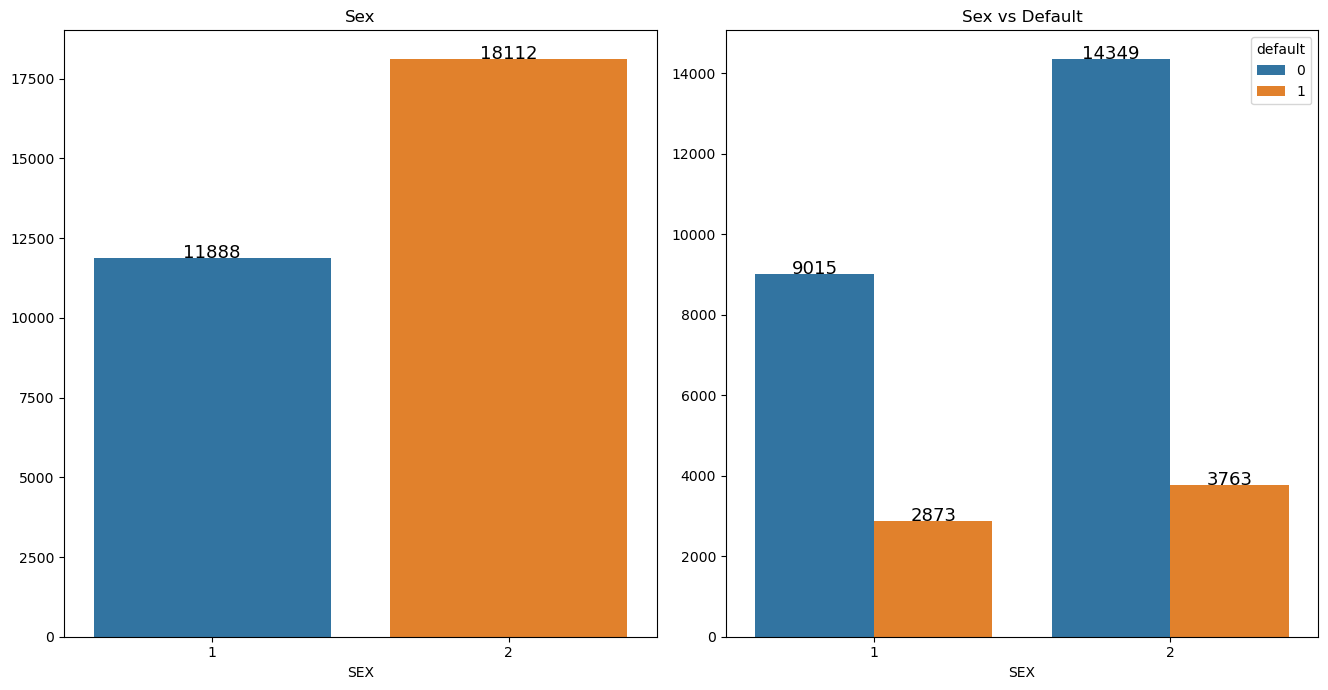

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

plt.subplot(1,3,1)
ax1 = sns.countplot(data=df, x='SEX')

for rect in ax1.patches:
    ax1.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=13)
ax1.set_title('Sex')
ax1.set_ylabel(None)

plt.subplot(1,3,2)
ax2 = sns.countplot(data=df, x='SEX', hue='default')

for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=13)
ax2.set_title('Sex vs Default')
ax2.set_ylabel(None)
plt.tight_layout();

In [20]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


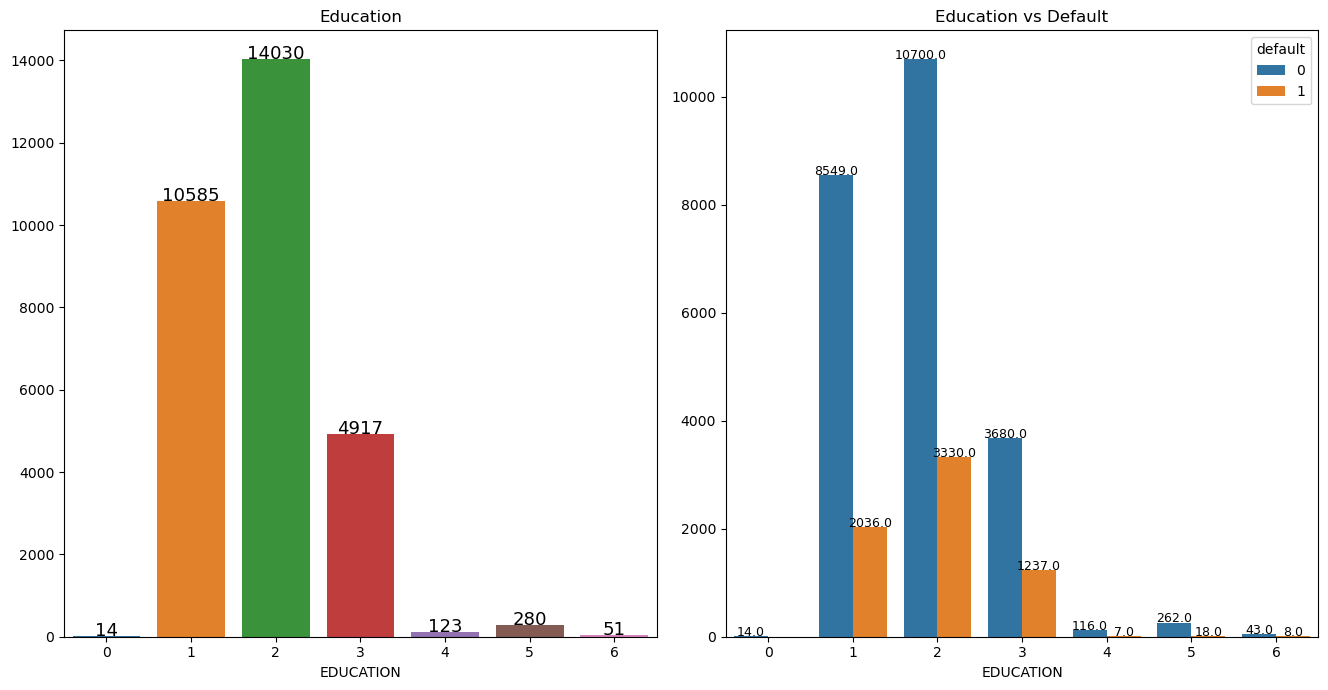

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

plt.subplot(1,3,1)
ax1 = sns.countplot(data=df, x='EDUCATION')

for rect in ax1.patches:
    ax1.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=13)
ax1.set_title('Education')
ax1.set_ylabel(None)

plt.subplot(1,3,2)
ax2 = sns.countplot(data=df, x='EDUCATION', hue='default')

for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=9)
ax2.set_title('Education vs Default')
ax2.set_ylabel(None)
plt.tight_layout();

In [22]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

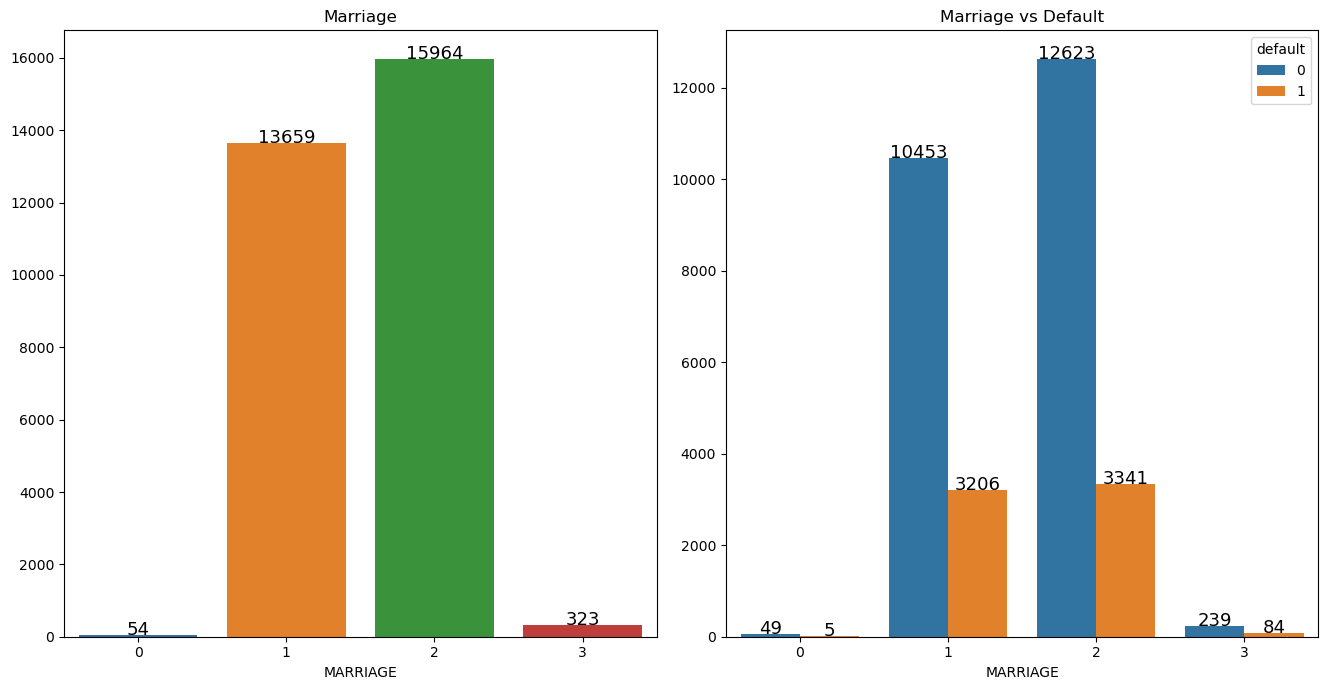

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

plt.subplot(1,3,1)
ax1 = sns.countplot(data=df, x='MARRIAGE')

for rect in ax1.patches:
    ax1.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=13)
ax1.set_title('Marriage')
ax1.set_ylabel(None)

plt.subplot(1,3,2)
ax2 = sns.countplot(data=df, x='MARRIAGE', hue='default')

for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, rect.get_height(),
            horizontalalignment='center', fontsize=13)
ax2.set_title('Marriage vs Default')
ax2.set_ylabel(None)
plt.tight_layout();

**Nhận xét**

- Số lượng nữ nhiều tương đối so với số lượng nam. Số lượng khách hàng mất khả năng trả nợ ở khách hàng nữ không chênh lệch quá nhiều so với nam
- Đa phần khách hàng có học vấn thuộc nhóm đại học, tốt nghiệp trung học, và trung học. Khách ở nhóm đại học có lượng người mất khả năng trả nợ nhiều nhất, tiếp đến là nhóm tốt nghiệp trung học và trung học. Có những nhóm không rõ thông tin sẽ được gộp lại sau
- Số khách hàng độc thân chiếm nhiều nhất, sau đó là kết hôn. Số khách hàng mất khả năng trả nợ ở 2 nhóm nay tương đương nhau. Có những nhóm thiểu số còn lại sẽ được gộp lại sau

## 2.2 Numerical Features

**Bills**

In [24]:
# Bill amounts
bills = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig, ax = plt.subplots(3,2, figsize=(15, 30))

ax[0,0] = sns.histplot(data=df, x='BILL_AMT1', hue='default')
ax[0,1] = sns.histplot(data=df, x='BILL_AMT2')

def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure(figsize=(20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

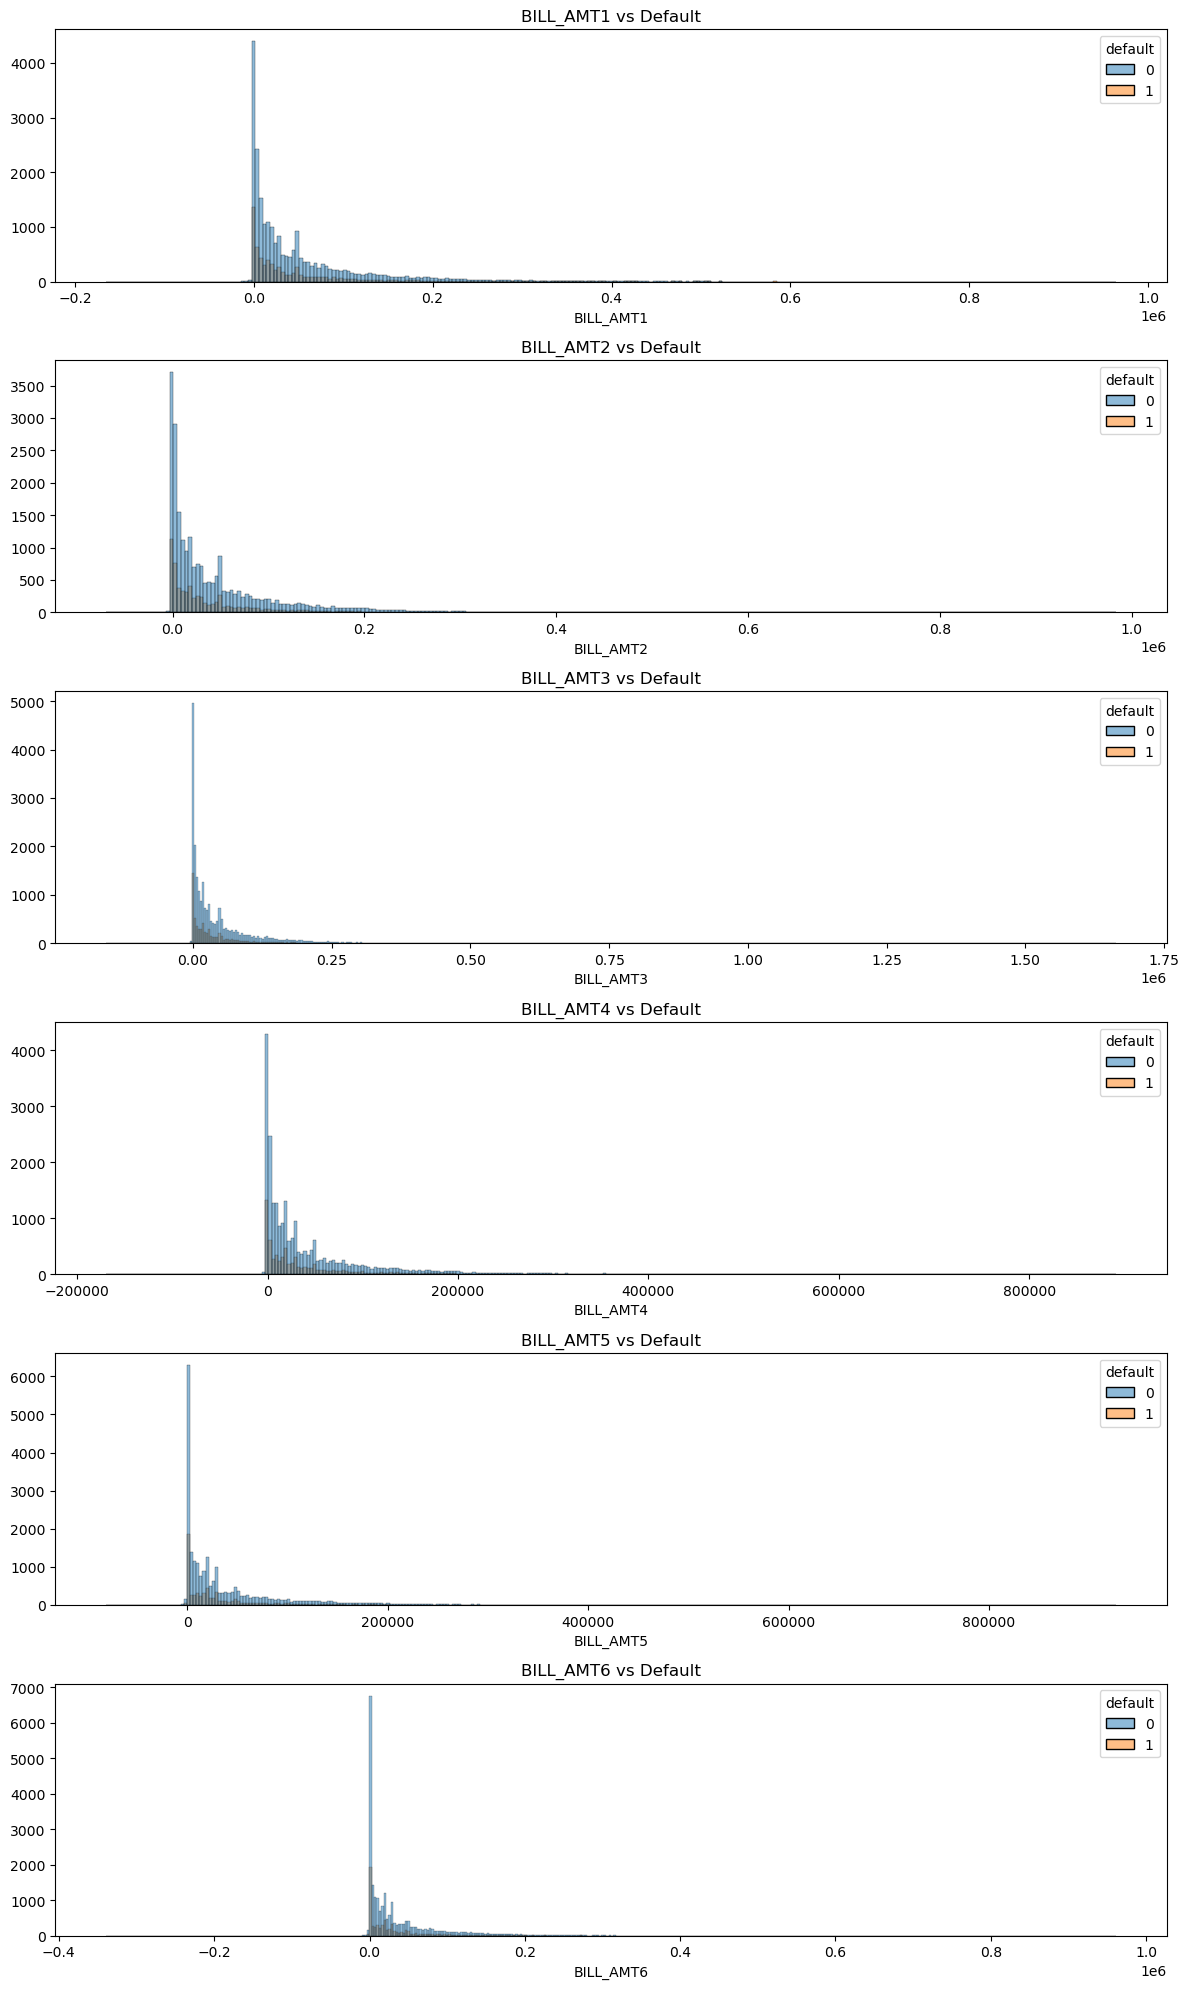

In [25]:
fig, ax = plt.subplots(6,1,figsize=(12,20))

for i in range(len(bills)):
    plt.subplot(6,1,i+1)
    ax = sns.histplot(data=df, x=bills[i], hue='default')
    ax.set_title(bills[i] + ' vs Default')
    ax.set_ylabel(None)
plt.tight_layout();

**Nhận xét**

- Phân bố dữ liệu rất lệch
- Đa phần sự phân bố nằm về phía bên trái nhỏ hơn 200000
- Cần xem xét các điểm dữ liệu quá lớn

**Pay amounts**

In [26]:
pay_amt = 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

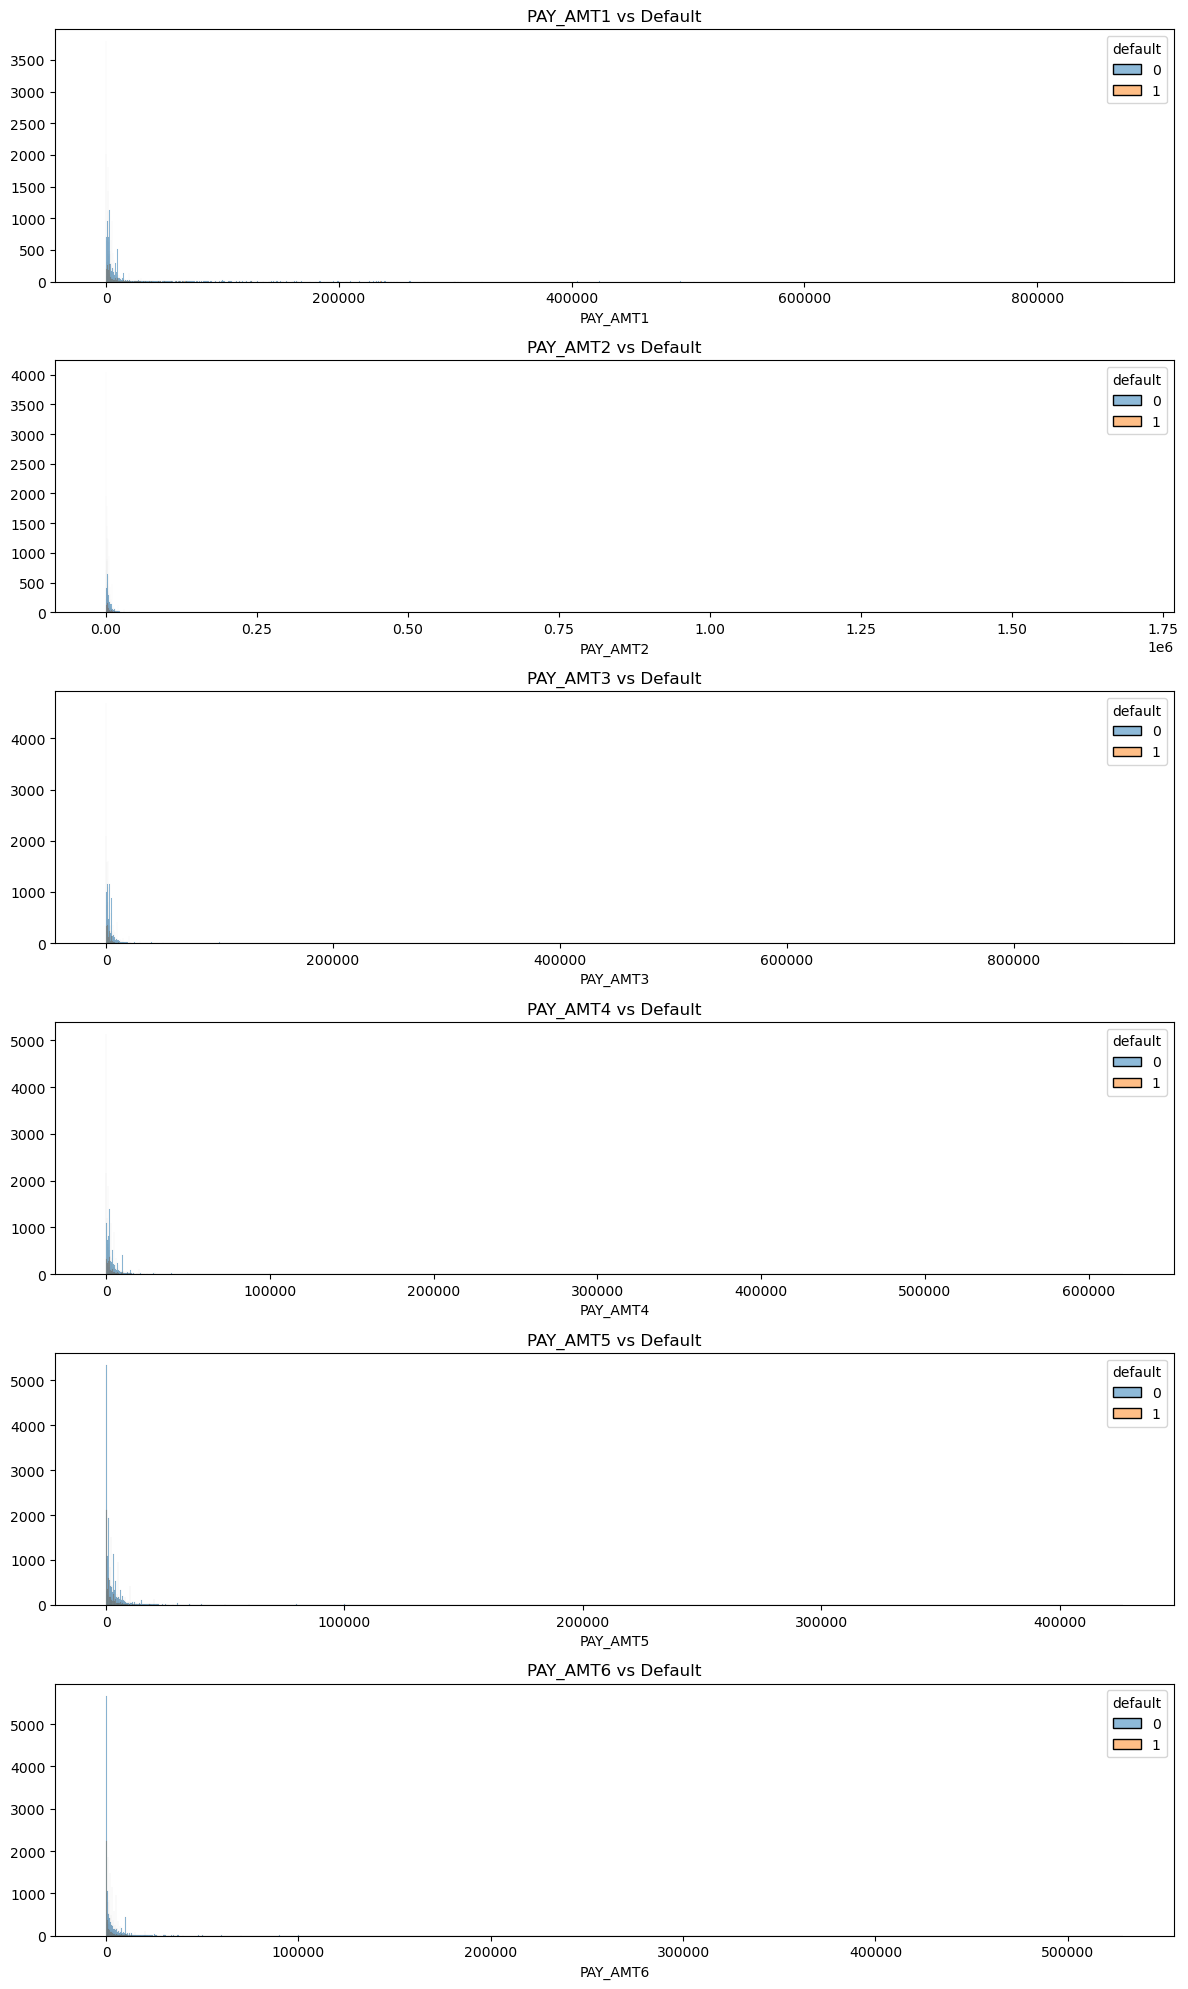

In [27]:
fig, ax = plt.subplots(6,1,figsize=(12,20))

for i in range(len(pay_amt)):
    plt.subplot(6,1,i+1)
    ax = sns.histplot(data=df, x=pay_amt[i], hue='default')
    ax.set_title(pay_amt[i] + ' vs Default')
    ax.set_ylabel(None)
plt.tight_layout();

**Nhận xét**

- Phân bố dữ liệu rất lệch
- Đa phần sự phân bố nằm về phía bên trái nhỏ hơn 100000
- Cần xem xét các điểm dữ liệu quá lớn

**Repayment status**

In [28]:
pays = 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


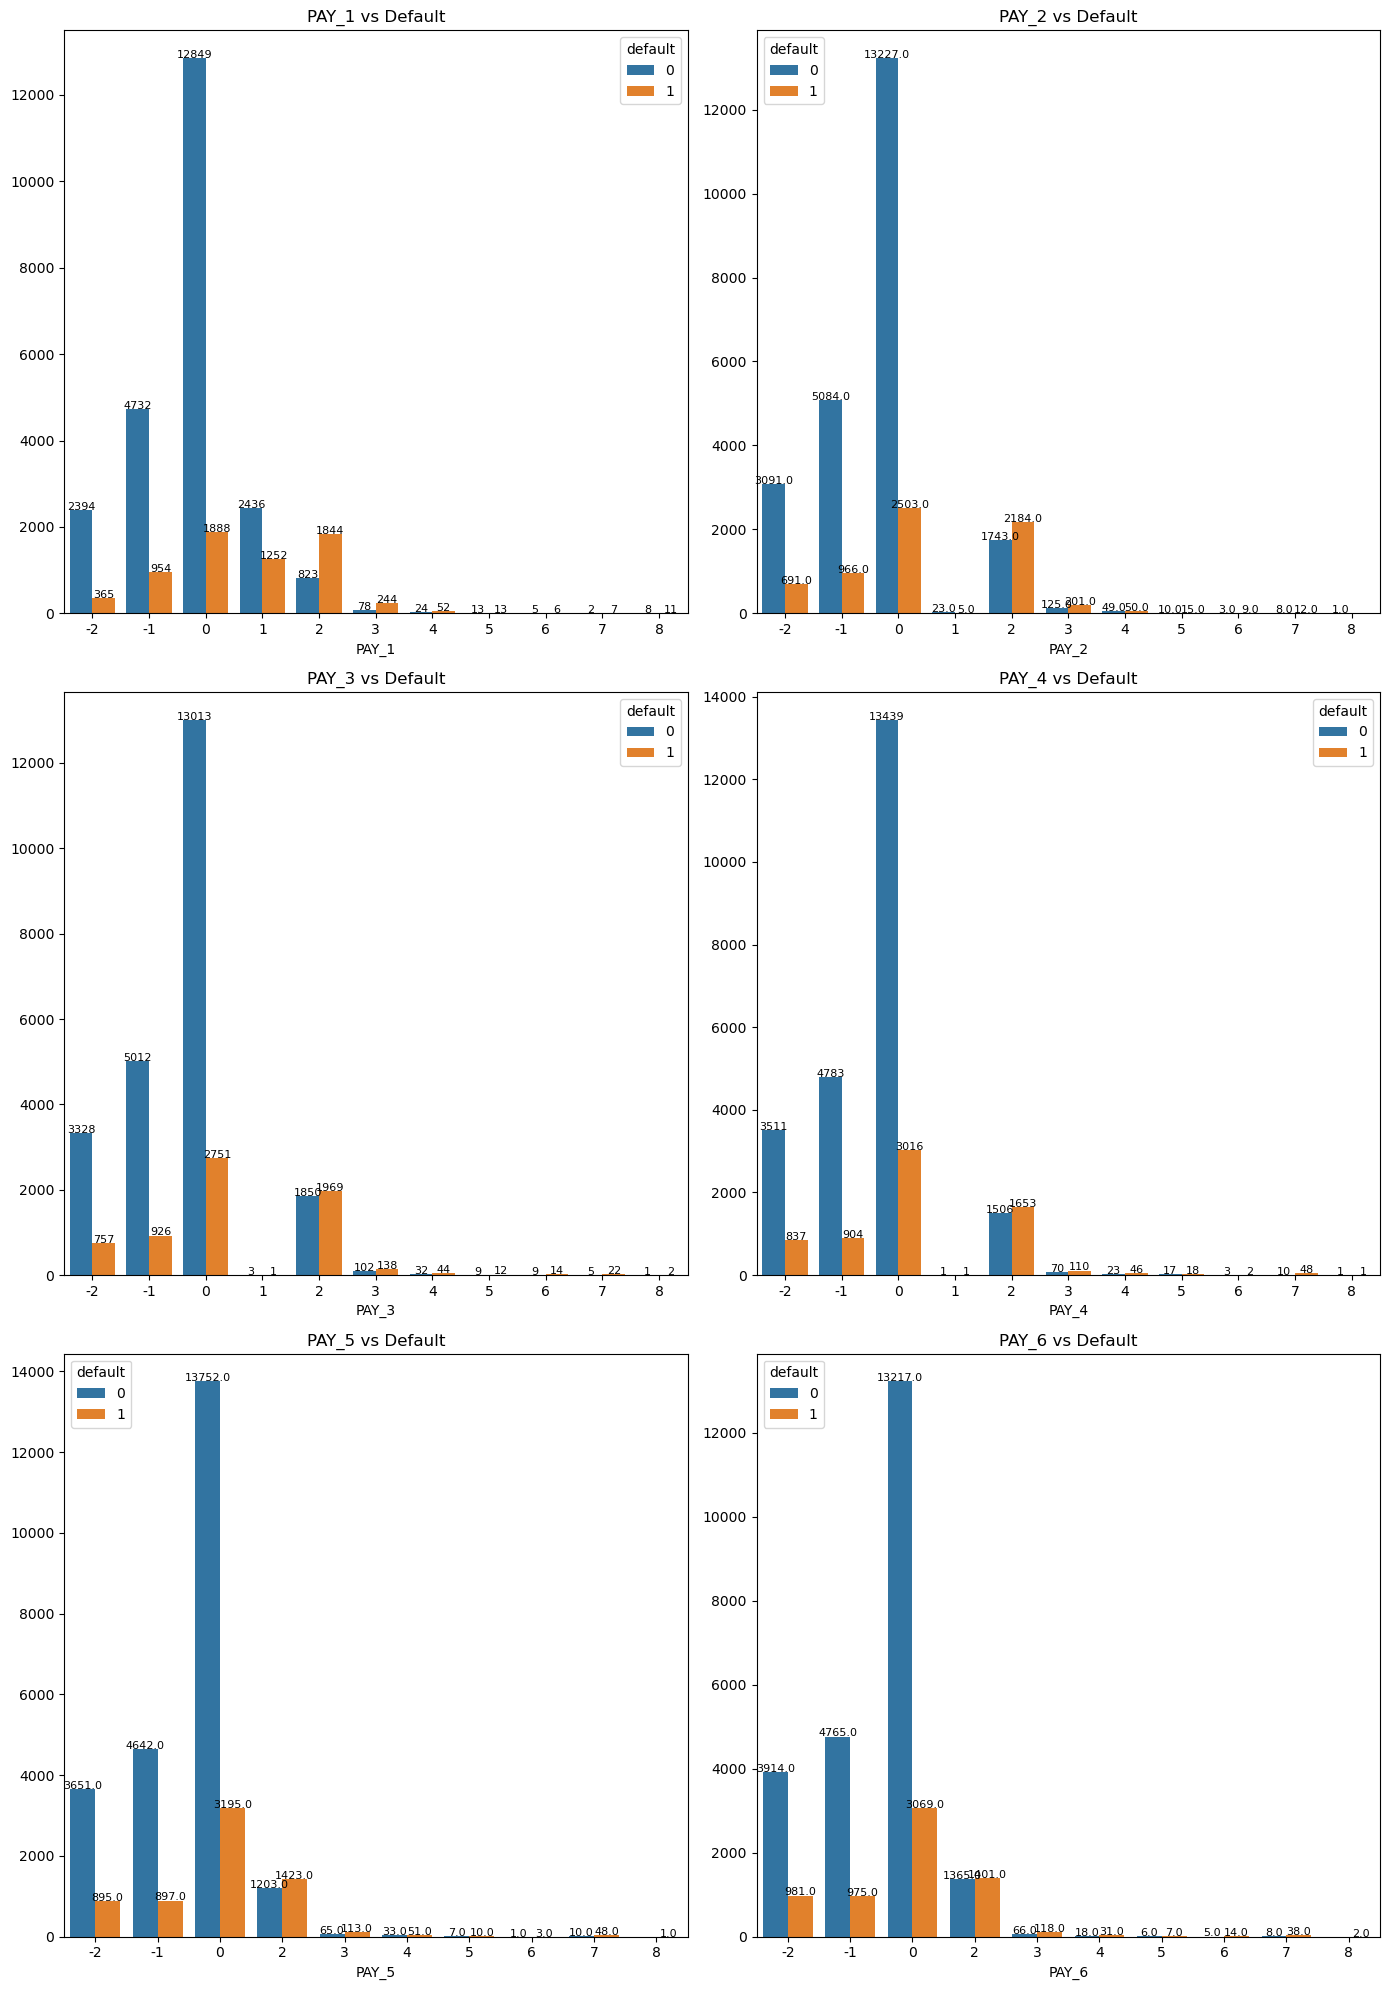

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(14,20))

for i in range(len(pays)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=df, x=pays[i], hue='default')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=8)
    ax.set_title(pays[i] + ' vs Default')
    ax.set_ylabel(None)
plt.tight_layout();

**Nhận xét**
- Đa phần khách hàng có các lần trả nợ đúng hạn
- Trường hợp trả nợ muộn, có thể thấy đa phần khách hàng trả muộn 2 tháng
- Có thể gộp các trường hợp nộp trước hạn là đúng hạn

**Age**

<AxesSubplot:xlabel='AGE', ylabel='Count'>

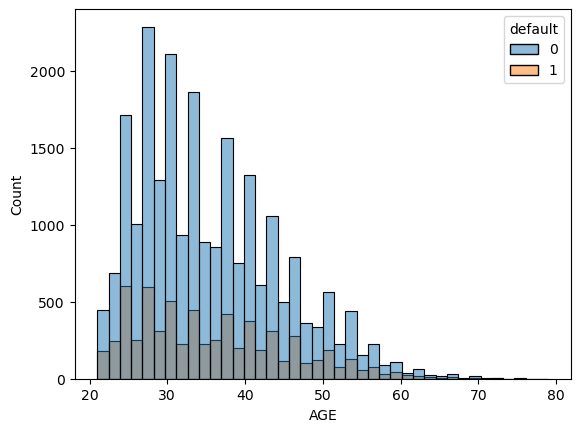

In [30]:
sns.histplot(data=df, x='AGE', hue='default', bins=40)

**Nhận xét**
- Độ tuổi từ 23 đến 44 chiếm phần lớn
- Độ tuổi trên cũng là độ tuổi có lượng khách mất khả năng trả nợ nhiều

**Balance limit**

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

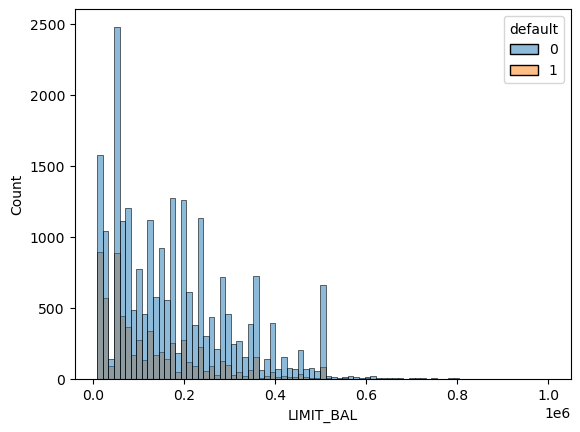

In [31]:
sns.histplot(data=df, x='LIMIT_BAL', hue='default')

**Nhận xét**
- Mức giới hạn trong thẻ tín dụng phần lớn nằm từ 10000 đến khoảng 400000
- Mức giới hạn càng lớn thì lượng khách mất khả năng trả nợ càng ít dần
- Có những điểm dữ liệu lớn hơn bình thường

# III. Data Wrangling and Feature Engineering

## 1. Data Wrangling

**Education: Gộp những giá trị tương đồng**

In [32]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

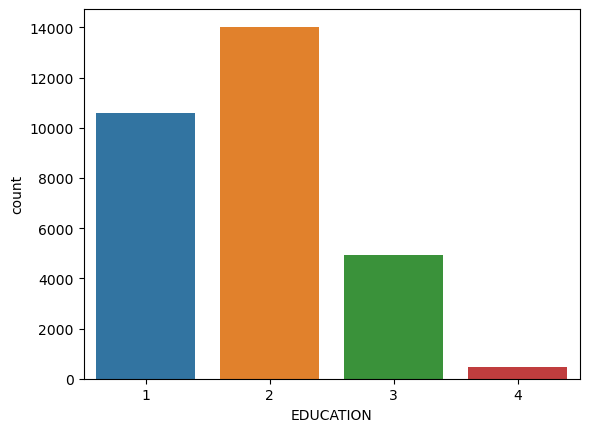

In [33]:
sns.countplot(data=df, x='EDUCATION')

**Marriage: Gộp những giá trị tương đồng**

In [34]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

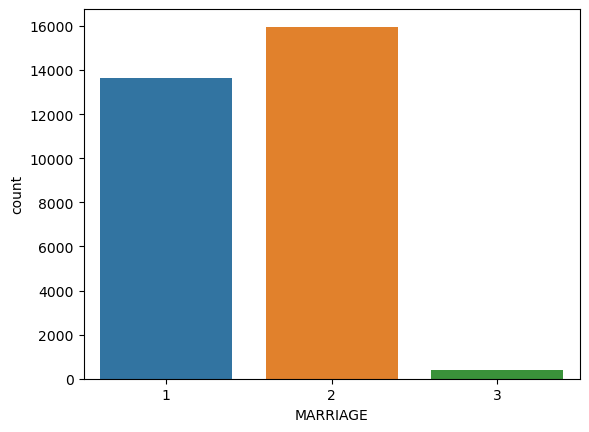

In [35]:
sns.countplot(data=df, x='MARRIAGE')

**Repayment status: Chuyển những giá trị tương ứng với đúng hạn về 1 giá trị**

In [36]:
fil1 = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil1, 'PAY_1'] = 0
fil2 = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil2, 'PAY_2'] = 0
fil3 = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil3, 'PAY_3'] = 0
fil4 = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil4, 'PAY_4'] = 0
fil5 = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil5, 'PAY_5'] = 0
fil6 = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil6, 'PAY_6'] = 0

**Kiểm tra những giá trị lớn**

In [37]:
df[df['PAY_AMT1'] > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                            'PAY_AMT1', 'BILL_AMT1', 'default']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,default
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [38]:
df[df['BILL_AMT1'] > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT1', 
                            'PAY_AMT1', 'BILL_AMT2','PAY_AMT2', 'default']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,default
6,500000.0,0,0,367965.0,55000.0,412023.0,40000.0,0
59,400000.0,0,0,400134.0,17000.0,398857.0,15029.0,0
102,480000.0,0,0,422069.0,16078.0,431342.0,55693.0,0
123,310000.0,2,0,304991.0,13019.0,311243.0,11128.0,1
221,330000.0,0,0,335196.0,12388.0,334954.0,12378.0,0
...,...,...,...,...,...,...,...,...
29871,420000.0,0,0,405274.0,14302.0,411980.0,10500.0,0
29878,340000.0,0,0,362178.0,10116.0,303611.0,3300.0,1
29883,420000.0,0,0,454391.0,20000.0,466810.0,24000.0,0
29921,410000.0,0,0,468749.0,17259.0,411016.0,18600.0,1


**Nhận xét**

- Có thể thấy những khách hàng có mức chi tiêu lớn thì hạn tính dụng của họ cũng cao
- Đa phần những khách hàng này có khả năng chi trả (hợp lý với thông tin được tìm hiểu ở phần EDA)
- Nếu loại sẽ dẫn đến mất thông tin về những khách hàng có mức chi tiêu lớn

## 2. Feature Engineering

- encode
- smote
- scale
- split

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

### Encode

In [40]:
#One Hot encoding
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,1,0,0
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,1,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,1,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0,0,1,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0,1,0,0


### Handle the inbalanced dataset

In [41]:
X = df.drop('default', axis=1)
y = df['default']

In [42]:
smote = SMOTE(sampling_strategy=0.85)
X_res, y_res = smote.fit_resample(X, y)

print('Original target shape {}'.format(Counter(y)))
print('Resampled target shape {}'.format(Counter(y_res)))

Original target shape Counter({0: 23364, 1: 6636})
Resampled target shape Counter({0: 23364, 1: 19859})


### Divide Age into bins

In [43]:
bins_names = [1, 2, 3, 4, 5, 6]
X_res['AgeBin'] = pd.cut(X_res['AGE'], 6, labels=bins_names)
X_res.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AgeBin
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,1
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,1,0,0,0,1,0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,1,0,0,0,1,0,2
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,1,0,0,1,0,0,2
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,1,0,0,1,0,0,4


### Drop Age feature

In [44]:
X_res.drop('AGE', axis=1, inplace=True)
X_res['AgeBin'] = X_res['AgeBin'].astype(int)

### Split dataset

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=31)

### Scale features

In [46]:
num_features.remove('AGE')

In [47]:
scaler = StandardScaler()

In [48]:
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

---

# IV. Modeling

In [49]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import auc, precision_recall_curve, plot_precision_recall_curve

### 1. Logistic Regression

roc auc score: 0.8434453819889376
auc_precision_recall: 0.9218716435603842
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4590
           1       0.93      0.74      0.82      4055

    accuracy                           0.85      8645
   macro avg       0.87      0.84      0.85      8645
weighted avg       0.86      0.85      0.85      8645



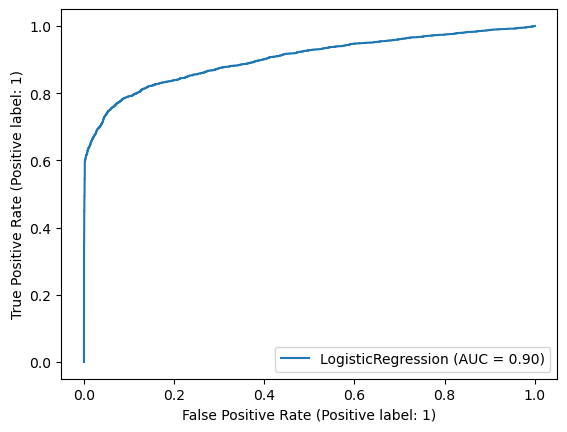

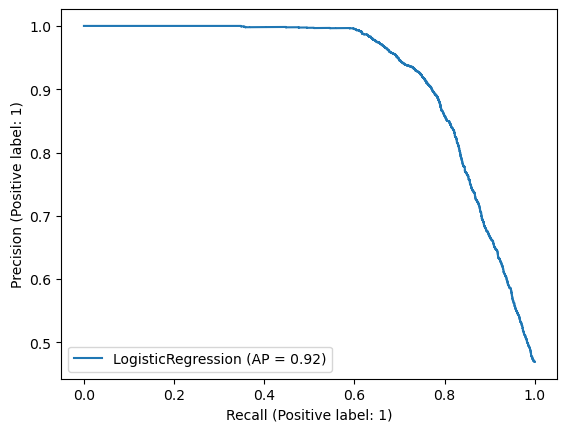

In [50]:
accuracies = []
roc_auc_scores = []
aucpr = []

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=31)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

y_score = log_reg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

accuracies.append(accuracy)
roc_auc_scores.append(roc_auc)
aucpr.append(auc_precision_recall)

print('roc auc score: {}'.format(roc_auc))
print('auc_precision_recall: {}'.format(auc_precision_recall))
print(classification_report(y_test, y_pred))
plot_roc_curve(log_reg, X_test, y_test)
plot_precision_recall_curve(log_reg, X_test, y_test)

<AxesSubplot:>

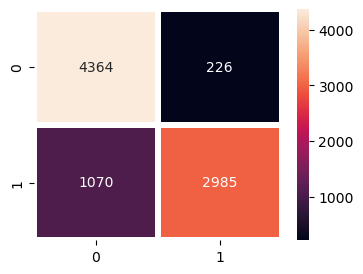

In [51]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 2. Random Forest

roc auc score: 0.8655440310115005
auc_precision_recall: 0.9362710741862493
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4590
           1       0.90      0.81      0.85      4055

    accuracy                           0.87      8645
   macro avg       0.87      0.87      0.87      8645
weighted avg       0.87      0.87      0.87      8645



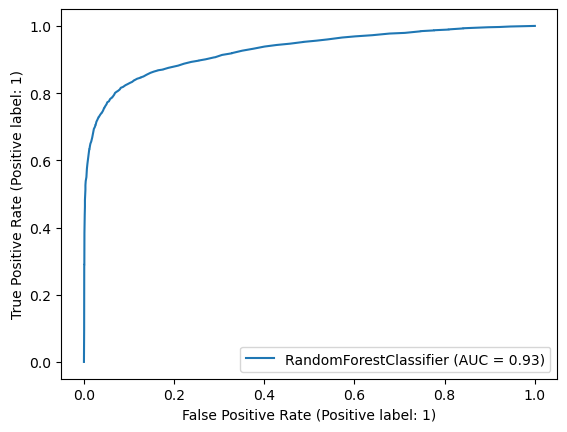

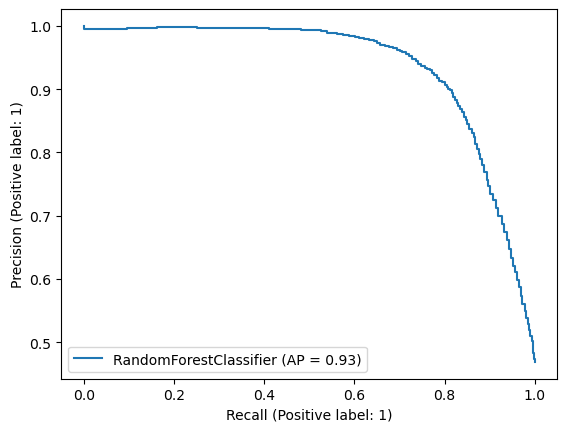

In [52]:
rf = RandomForestClassifier(random_state=31)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

y_score2 = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score2)
auc_precision_recall2 = auc(recall, precision)
roc_auc2 = roc_auc_score(y_test, y_pred2)
accuracy_score2 = accuracy_score(y_test, y_pred2)

accuracies.append(accuracy_score2)
roc_auc_scores.append(roc_auc2)
aucpr.append(auc_precision_recall2)

print('roc auc score: {}'.format(roc_auc2))
print('auc_precision_recall: {}'.format(auc_precision_recall2))
print(classification_report(y_test, y_pred2))
plot_roc_curve(rf, X_test, y_test)
plot_precision_recall_curve(rf, X_test, y_test)

<AxesSubplot:>

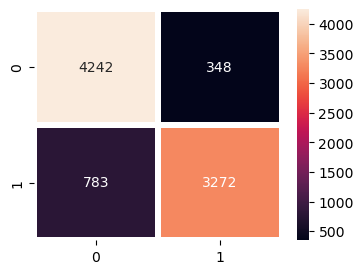

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred2),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 3. SVC

roc auc score: 0.8455513648122627
auc_precision_recall: 0.9199799386031308
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4590
           1       0.92      0.75      0.83      4055

    accuracy                           0.85      8645
   macro avg       0.86      0.85      0.85      8645
weighted avg       0.86      0.85      0.85      8645



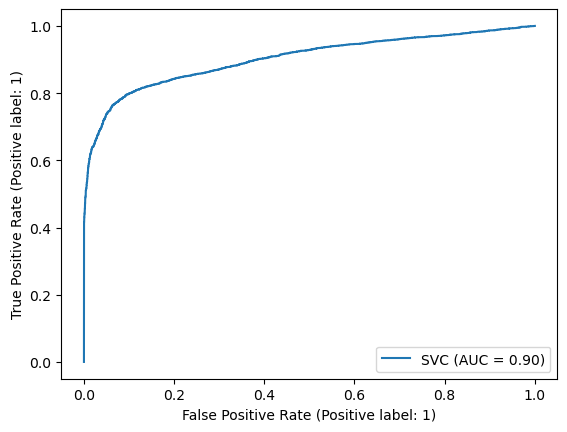

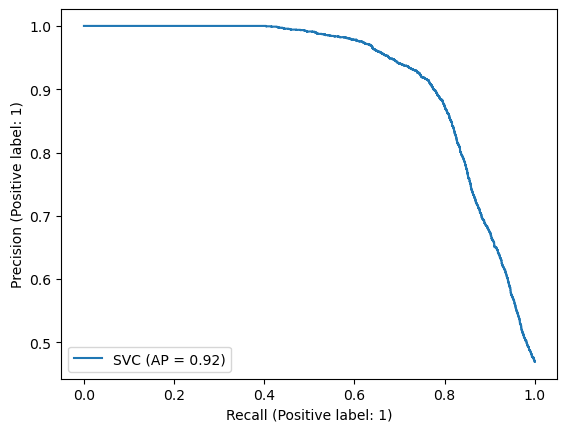

In [54]:
svc = SVC(random_state=31, probability=True)
svc.fit(X_train, y_train)
y_pred3 = svc.predict(X_test)

y_score3 = svc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score3)
auc_precision_recall3 = auc(recall, precision)
roc_auc3 = roc_auc_score(y_test, y_pred3)
accuracy_score3 = accuracy_score(y_test, y_pred3)

accuracies.append(accuracy_score3)
roc_auc_scores.append(roc_auc3)
aucpr.append(auc_precision_recall3)

print('roc auc score: {}'.format(roc_auc3))
print('auc_precision_recall: {}'.format(auc_precision_recall3))
print(classification_report(y_test, y_pred3))
plot_roc_curve(svc, X_test, y_test)
plot_precision_recall_curve(svc, X_test, y_test)

<AxesSubplot:>

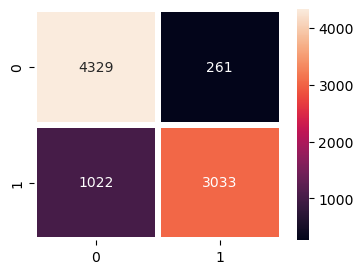

In [55]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred3),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 4. Decision Tree

roc auc score: 0.7901393959419636
auc_precision_recall: 0.8287035395667598
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4590
           1       0.77      0.79      0.78      4055

    accuracy                           0.79      8645
   macro avg       0.79      0.79      0.79      8645
weighted avg       0.79      0.79      0.79      8645



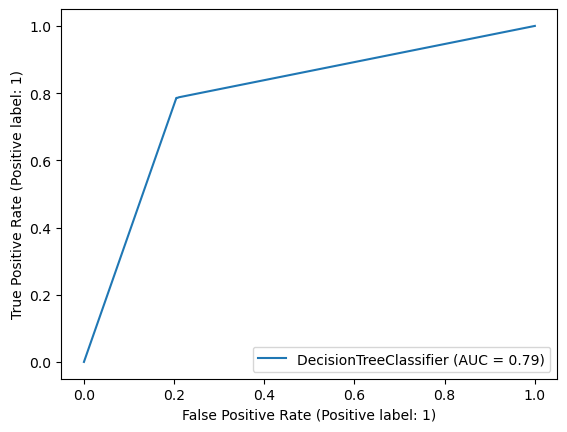

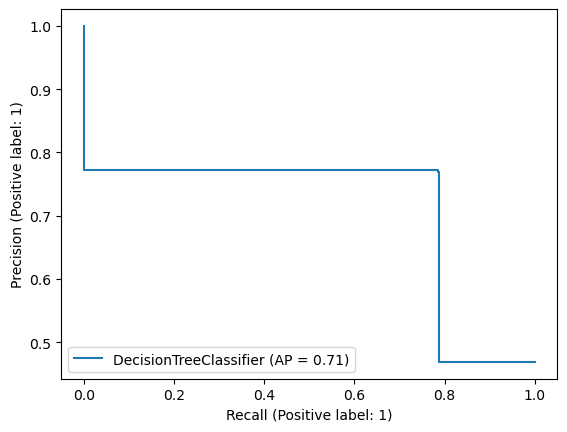

In [56]:
dct = DecisionTreeClassifier(random_state=31)
dct.fit(X_train, y_train)
y_pred4 = dct.predict(X_test)

y_score4 = dct.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score4)
auc_precision_recall4 = auc(recall, precision)
roc_auc4 = roc_auc_score(y_test, y_pred4)
accuracy_score4 = accuracy_score(y_test, y_pred4)

accuracies.append(accuracy_score4)
roc_auc_scores.append(roc_auc4)
aucpr.append(auc_precision_recall4)

print('roc auc score: {}'.format(roc_auc4))
print('auc_precision_recall: {}'.format(auc_precision_recall4))
print(classification_report(y_test, y_pred4))
plot_roc_curve(dct, X_test, y_test)
plot_precision_recall_curve(dct, X_test, y_test)

<AxesSubplot:>

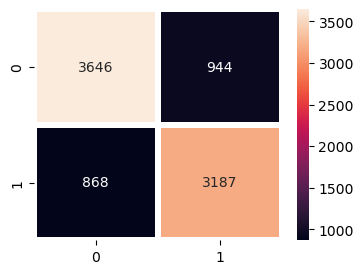

In [57]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred4),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 5. K-Nearest Neighbours (KNN)

roc auc score: 0.8230128220626516
auc_precision_recall: 0.9019553404381382
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4590
           1       0.84      0.78      0.81      4055

    accuracy                           0.83      8645
   macro avg       0.83      0.82      0.82      8645
weighted avg       0.83      0.83      0.83      8645



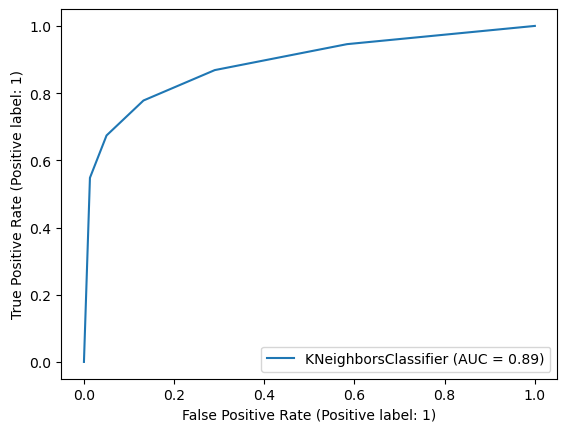

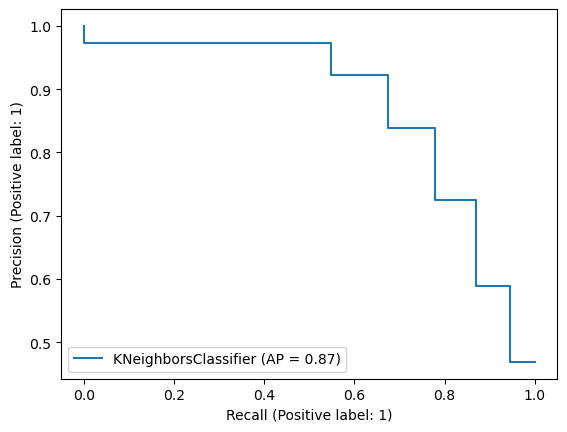

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)

y_score5 = knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score5)
auc_precision_recall5 = auc(recall, precision)
roc_auc5 = roc_auc_score(y_test, y_pred5)
accuracy_score5 = accuracy_score(y_test, y_pred5)

accuracies.append(accuracy_score5)
roc_auc_scores.append(roc_auc5)
aucpr.append(auc_precision_recall5)

print('roc auc score: {}'.format(roc_auc5))
print('auc_precision_recall: {}'.format(auc_precision_recall5))
print(classification_report(y_test, y_pred5))
plot_roc_curve(knn, X_test, y_test)
plot_precision_recall_curve(knn, X_test, y_test)

<AxesSubplot:>

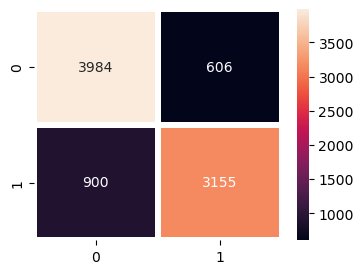

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred5),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 6. Gaussian Naive Bayes

roc auc score: 0.6350274950369243
auc_precision_recall: 0.9019553404381382
              precision    recall  f1-score   support

           0       0.80      0.38      0.51      4590
           1       0.56      0.89      0.69      4055

    accuracy                           0.62      8645
   macro avg       0.68      0.64      0.60      8645
weighted avg       0.69      0.62      0.60      8645



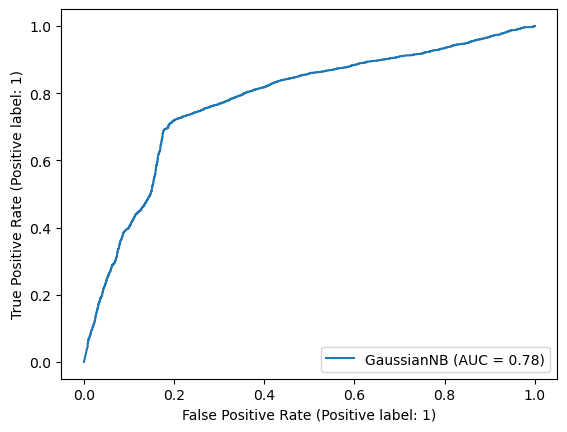

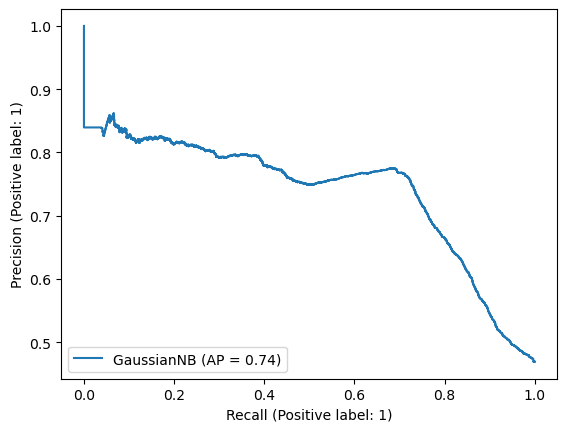

In [60]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred6 = nb.predict(X_test)

y_score6 = knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score6)
auc_precision_recall6 = auc(recall, precision)
roc_auc6 = roc_auc_score(y_test, y_pred6)
accuracy_score6 = accuracy_score(y_test, y_pred6)

accuracies.append(accuracy_score6)
roc_auc_scores.append(roc_auc6)
aucpr.append(auc_precision_recall6)

print('roc auc score: {}'.format(roc_auc6))
print('auc_precision_recall: {}'.format(auc_precision_recall6))
print(classification_report(y_test, y_pred6))
plot_roc_curve(nb, X_test, y_test)
plot_precision_recall_curve(nb, X_test, y_test)

<AxesSubplot:>

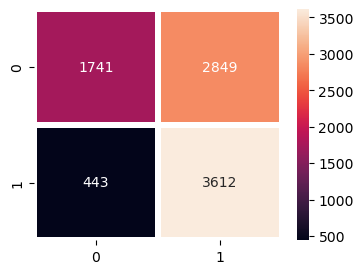

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred6),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

### 7. XGBoost

roc auc score: 0.8535926221427055
auc_precision_recall: 0.9317719426542864
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4590
           1       0.92      0.77      0.84      4055

    accuracy                           0.86      8645
   macro avg       0.87      0.85      0.86      8645
weighted avg       0.87      0.86      0.86      8645



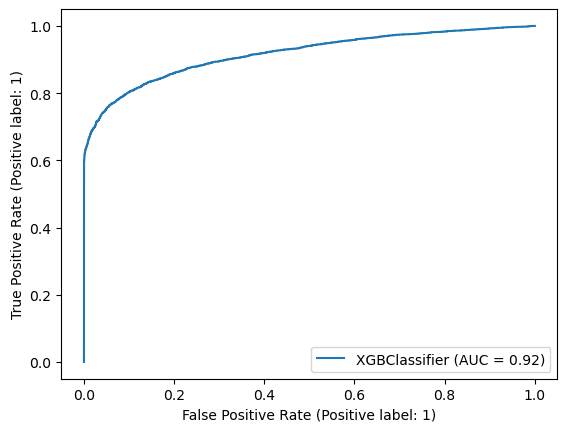

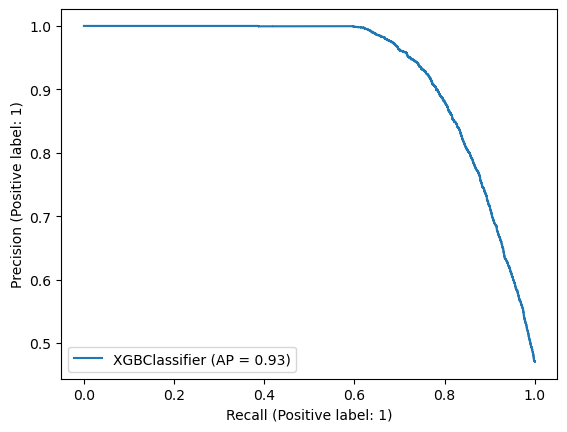

In [62]:
xgb = XGBClassifier(random_state=31)
xgb.fit(X_train, y_train)
y_pred7 = xgb.predict(X_test)

y_score7 = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score7)
auc_precision_recall7 = auc(recall, precision)
roc_auc7 = roc_auc_score(y_test, y_pred7)
accuracy_score7 = accuracy_score(y_test, y_pred7)

accuracies.append(accuracy_score7)
roc_auc_scores.append(roc_auc7)
aucpr.append(auc_precision_recall7)

print('roc auc score: {}'.format(roc_auc7))
print('auc_precision_recall: {}'.format(auc_precision_recall7))
print(classification_report(y_test, y_pred7))
plot_roc_curve(xgb, X_test, y_test)
plot_precision_recall_curve(xgb, X_test, y_test)

<AxesSubplot:>

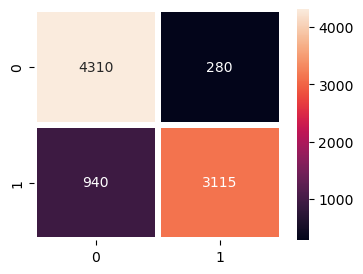

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred7),
                annot=True,fmt = "d",linecolor="white",linewidths=3)

---

# V. Result Summary

In [64]:
algorithm = [
    'Logistic Regression',
    'RandomForestClassifier',
    'SVC',
    'DecisionTreeClassifier',
    'K-Nearest Neighbours',
    'Naive Bayes',
    'XGBClassifier',
    ]

result = {
    'ML Algorithm': algorithm,
    'Accuracy score': accuracies,
    'ROC AUC score': roc_auc_scores,
    'AUC precision_recall score': aucpr
}

summary = pd.DataFrame(result)
summary.sort_values(by=['AUC precision_recall score', 'ROC AUC score'], ascending=False)

,ML Algorithm,Accuracy score,ROC AUC score,AUC precision_recall score
1,RandomForestClassifier,0.869173,0.865544,0.936271
6,XGBClassifier,0.858878,0.853593,0.931772
0,Logistic Regression,0.850087,0.843445,0.921872
2,SVC,0.851591,0.845551,0.919980
4,K-Nearest Neighbours,0.825795,0.823013,0.901955
5,Naive Bayes,0.619202,0.635027,0.901955
3,DecisionTreeClassifier,0.790399,0.790139,0.828704


**Thuật toán Random Forest cho thấy điểm số cao nhất trong những thuật toán đưa vào xây dựng với điểm AUCPR là khoảng 0.936, điểm ROC AUC đạt 0.865, điểm accuracy khoảng 0.869**